In [ ]:
pip install sklearn

In [ ]:
pip install spacy

In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
from sklearn.cluster import KMeans
import string
import numpy as np

The Emotions dataset contains documents with different
emotion flag as categories (such as, sadness, anger, joy, etc.). Dataset is split into train, test & validation for building the machine learning model.


a) Load the train, test and validation datasets from csv files to pandas dataframe
objects

In [2]:
train_data = pd.read_csv('train.txt', header=None, sep=';', names=['Sentence', 'Sentiment'])
test_data = pd.read_csv('test.txt', header=None, sep=';', names=['Sentence', 'Sentiment'])
validation_data = pd.read_csv("val.txt", header=None, sep=';', names=['Sentence', 'Sentiment'])


In [3]:
train_data.head(5)

,Sentence,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


b) Perform the necessary pre-text processing (similar to previous questions) for
vocabulary generation and representing text (try both CountVectorizer and
TfidfVectorizer of sklearn or similar methods in NLTK library).

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
# train
def preprocess_txt(train_data):
    # Convert to lowercase
    train_data = [i.lower() for i in train_data]

    # Remove numbers
    train_data = [re.sub(r'\d+', '', data) for data in train_data]

    # Punctuation Removal
    string.punctuation
    train_data = ["".join([i for i in tok if i not in string.punctuation]) for tok in train_data]

    # Tokenization
    tokens = [word_tokenize(wd) for wd in train_data]

    # Stop Word Removal
    stop_words = nltk.corpus.stopwords.words('english')
    tokens = [[token for token in stp if token not in stop_words] for stp in tokens]

    # Perform Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stemmed_tokens = [[stemmer.stem(token) for token in orieja]for orieja in tokens]
    lemmatized_tokens = [[lemmatizer.lemmatize(token) for token in bulaba] for bulaba in tokens]
    preprocessed_txt = [' ' .join(lem) for lem in lemmatized_tokens]
    return preprocessed_txt

In [11]:
x_train= preprocess_txt(train_data.Sentence)
y_train = preprocess_txt(train_data.Sentiment)

In [12]:
x_test = preprocess_txt(test_data.Sentence)
y_test = preprocess_txt(test_data.Sentiment)

In [13]:
x_test

['im feeling rather rotten im ambitious right',
 'im updating blog feel shitty',
 'never make separate ever want feel like ashamed',
 'left bouquet red yellow tulip arm feeling slightly optimistic arrived',
 'feeling little vain one',
 'cant walk shop anywhere feel uncomfortable',
 'felt anger end telephone call',
 'explain clung relationship boy many way immature uncommitted despite excitement feeling getting accepted master program university virginia',
 'like breathless feeling reader eager see happen next',
 'jest feel grumpy tired pre menstrual probably week im fit walrus vacation summer',
 'feel particularly agitated',
 'feel beautifully emotional knowing woman knew handful holding baba journey',
 'pay attention deepens feeling invaded helpless',
 'feel extremely comfortable group people dont even need hide',
 'find odd position feeling supportive',
 'feeling heartbroken im sure katniss',
 'feel little mellow today',
 'feel like role would tear sail pessimism discontent',
 'feel 

In [14]:
x_val = preprocess_txt(validation_data.Sentence)
y_val = preprocess_txt(validation_data.Sentiment)

In [15]:
# y_train
unique_y_train = np.unique(y_train)
print("Unique_y_train",unique_y_train)

Unique_y_train ['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']


c) Train the dataset using Logistic Regression and Neural Network (two hidden
layers).

In [16]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers

In [17]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)
x_val = vectorizer.transform(x_val)

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

le.fit(y_test)
y_test = le.transform(y_test)

le.fit(y_val)
y_val = le.transform(y_val)


In [19]:
# Logistic Regression
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)
lr_acc = lr.score(x_test, y_test)
print("Logistic Regression accuracy:", lr_acc)


Logistic Regression accuracy: 0.8935


In [20]:
len(np.unique(y_train))

6

In [21]:
# Create a neural network model object with two hidden layers
# Building the Model
# define the model
model = tf.keras.Sequential()

# add the input layer
model.add(tf.keras.layers.Dense(784, activation='relu', input_shape=(x_train.shape[1],)))

# add the first hidden layer
model.add(tf.keras.layers.Dense(256, activation='relu'))

# add the second hidden layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

# add the output layer
model.add(tf.keras.layers.Dense(6, activation='softmax'))

In [22]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Training the Model

# define the batch size and number of epochs
batch_size = 32
epochs = 10

# fit the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
500/500 [==============================] - 166s 329ms/step - loss: 0.6437 - accuracy: 0.7667 - val_loss: 0.3786 - val_accuracy: 0.8755
Epoch 2/10
500/500 [==============================] - 144s 288ms/step - loss: 0.1179 - accuracy: 0.9574 - val_loss: 0.4068 - val_accuracy: 0.8785
Epoch 3/10
500/500 [==============================] - 126s 253ms/step - loss: 0.0406 - accuracy: 0.9852 - val_loss: 0.5271 - val_accuracy: 0.8730
Epoch 4/10
500/500 [==============================] - 127s 254ms/step - loss: 0.0231 - accuracy: 0.9915 - val_loss: 0.6321 - val_accuracy: 0.8700
Epoch 5/10
500/500 [==============================] - 127s 255ms/step - loss: 0.0170 - accuracy: 0.9934 - val_loss: 0.6906 - val_accuracy: 0.8750
Epoch 6/10
500/500 [==============================] - 141s 282ms/step - loss: 0.0249 - accuracy: 0.9911 - val_loss: 0.6849 - val_accuracy: 0.8625
Epoch 7/10
500/500 [==============================] - 127s 254ms/step - loss: 0.0286 - accuracy: 0.9898 - val_loss: 0.7704 -

In [24]:
# Evaluate the performance of the neural network model
model_score = model.evaluate(x_test, y_test)

# Print the results
print("Logistic Regression Accuracy:", lr_acc)
print("Neural Network Accuracy:", model_score[1])
# # print the accuracy
# print('Neural Network Accuracy: {}%'.format(model_score * 100))

63/63 [==============================] - 0s 5ms/step - loss: 0.8804 - accuracy: 0.8575
Logistic Regression Accuracy: 0.8935
Neural Network Accuracy: 0.8575000166893005


d) Perform classification evaluation in the test dataset (show accuracy, confusion
matrix etc.)


Logistic Regression accuracy: 0.8935


Text(0.5, 23.52222222222222, 'Truth value')

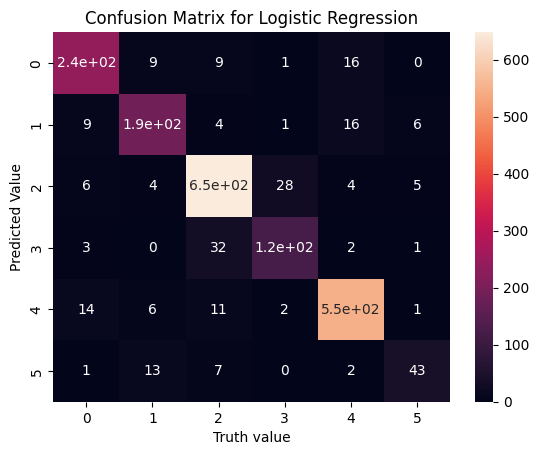

In [25]:
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix

# Logistic Regression
print("Logistic Regression accuracy:", lr_acc)

# Logistic Regression evaluation
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(y_test, lr_pred)

# Confusion Matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_pred)
# print("Confusion Matrix for Logistic Regression\n", lr_cm)

sn.heatmap(lr_cm, annot=True)
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Predicted Value')
plt.xlabel('Truth value')

Neural Network Accuracy: 0.8575000166893005
63/63 [==============================] - 0s 3ms/step


Text(0.5, 23.52222222222222, 'Truth value')

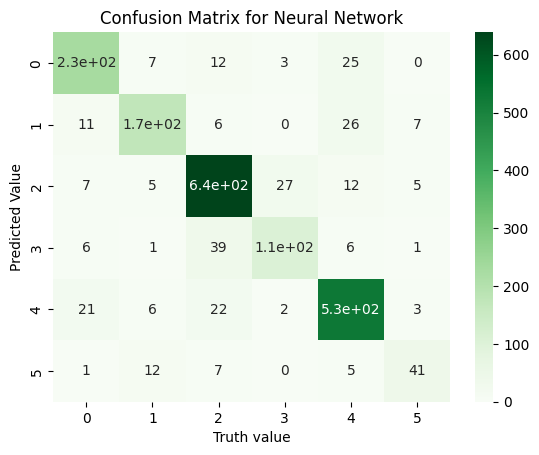

In [26]:
# # Neural Network evaluation
# Neural Network accuracy
print("Neural Network Accuracy:", model_score[1])
nn_pred = model.predict(x_test)
nn_pred = np.argmax(nn_pred, axis=1)
nn_acc = accuracy_score(y_test, nn_pred)
nn_cm = confusion_matrix(y_test, nn_pred)
# print("Confusion Matrix for Neural Network\n", nn_cm)

sn.heatmap(nn_cm, annot=True, cmap=plt.cm.Greens)
plt.title('Confusion Matrix for Neural Network')
plt.ylabel('Predicted Value')
plt.xlabel('Truth value')

e) Use any two new sentences (not in the datasets) as test cases based on any of
the emotions in the dataset and predict the categories.

In [27]:
new_sentences = ["I feel giddy today!", "This situation is making me very angry"]
new_X = vectorizer.transform(new_sentences)

# Logistic Regression prediction
lr_new_pred = lr.predict(new_X)
print("Logistics Reg Prediction",lr_new_pred)

# Neural Network prediction
nn_new_pred = model.predict(new_X)
nn_new_pred = np.argmax(nn_new_pred, axis=1)

print("Neural Network Prediction",nn_new_pred)


Logistics Reg Prediction [2 0]
1/1 [==============================] - 0s 18ms/step
Neural Network Prediction [4 0]


f) Perform a K-means Clustering in the training set and plot the accuracy (Elbow
method) of different cluster sizes (3-10) and determine the best cluster size.

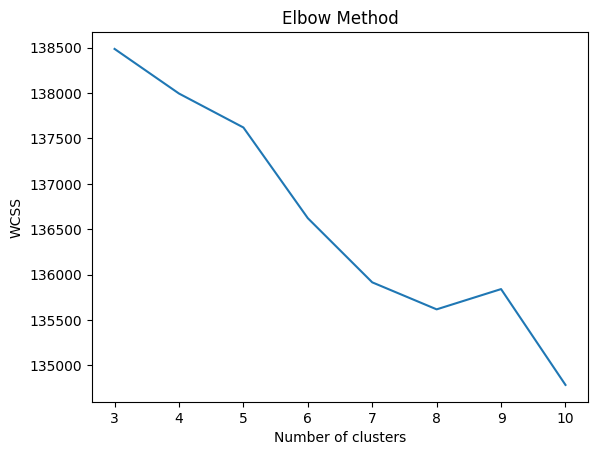

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(3, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(3, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

g) Show the cluster membership of the sentences in the test dataset.


In [29]:
x_train=x_train.toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


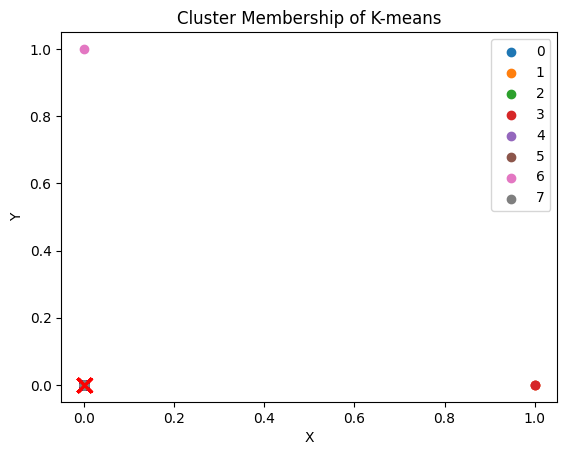

In [30]:
#Applying k-means algorithm with 8 clusters
kmeans=KMeans(n_clusters=8)
km=kmeans.fit_predict(x_train)

#Getting unique labels
u_labels = np.unique(km)

#plotting the results:
for i in u_labels:
    plt.scatter(x_train[km == i , 0] , x_train[km == i , 1] , label = i)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.title('Cluster Membership of K-means')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


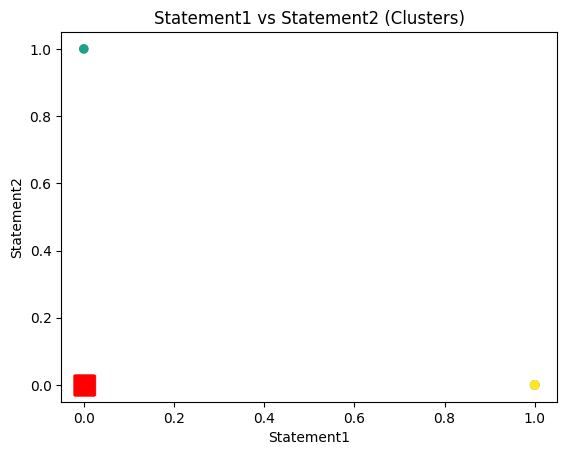

In [31]:
#Applying k-means algorithm with 8 clusters
kmeans=KMeans(n_clusters=8)
km=kmeans.fit_predict(x_train)

#Plotting the result
plt.scatter(x_train[:,0],x_train[:,1], c=km)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,marker='s',c='red',alpha=0.7)
plt.title('Statement1 vs Statement2 (Clusters)')
plt.xlabel('Statement1')
plt.ylabel('Statement2')
plt.show()
